<a href="https://colab.research.google.com/github/sril1485/CE888/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval  
def boostrap_mean(sample, sample_size, n_iterations):
	data_mean = np.array([])
	for i in range(0,n_iterations):
		sample_itr = np.random.choice(sample, size=5)
		result = np.mean(sample_itr)	
		data_mean = np.append(data_mean, result)
	m=np.mean(data_mean)
	lower=np.percentile(data_mean,5)
	upper=np.percentile(data_mean,95)
	return m,lower,upper

(0, 100000)

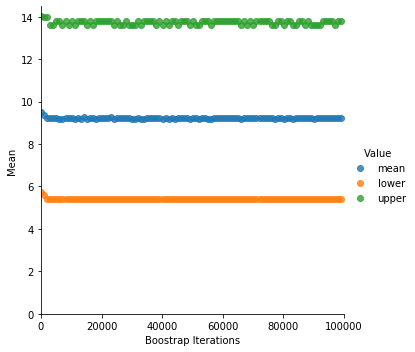

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	data_mean = np.array([])
	for i in range(0,iterations):
		sample_itr = np.random.choice(sample, size=5)
		result = np.mean(sample_itr)	
		data_mean = np.append(data_mean, result)
	m=np.mean(data_mean)
	lower=np.percentile(data_mean,100-ci)
	upper=np.percentile(data_mean,ci)
	return m,lower,upper
	return data_mean, lower, upper

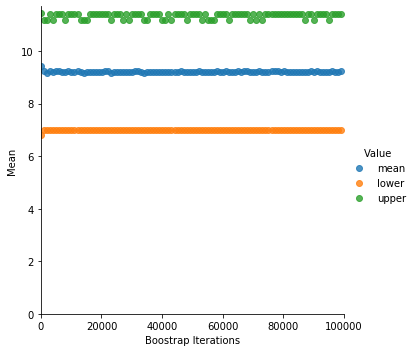

In [0]:

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:
# Load and visualise the vehicles dataset
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

old = df.values.T[0]
new = df.values.T[1]
print(new)

# Note: you can add more cells as needed to organise your code and your plots


[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

In [0]:
new = new[np.logical_not(np.isnan(new))]

In [0]:
new

array([24., 27., 27., 25., 31., 35., 24., 19., 28., 23., 27., 20., 22.,
       18., 20., 31., 32., 31., 32., 24., 26., 29., 24., 24., 33., 33.,
       32., 28., 19., 32., 34., 26., 30., 22., 22., 33., 39., 36., 28.,
       27., 21., 24., 30., 34., 32., 38., 37., 30., 31., 37., 32., 47.,
       41., 45., 34., 33., 24., 32., 39., 35., 32., 37., 38., 34., 34.,
       32., 33., 32., 25., 24., 37., 31., 36., 36., 34., 38., 32., 38.,
       32.])

In [0]:
np.histogram(old,bins=10)

(array([ 7, 45, 44, 55, 30, 23, 21, 10,  7,  7]),
 array([ 9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39.]))

In [0]:
import matplotlib.pyplot as plt


(array([139.,  85.,  24.,   0.]),
 array([10, 20, 30, 40, 50]),
 <a list of 4 Patch objects>)

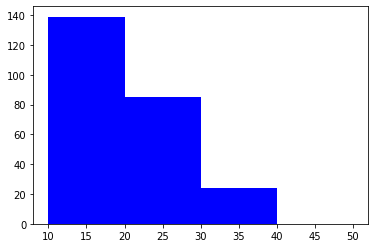

In [0]:
plt.hist(old,color='b',bins=[10,20,30,40,50])


(array([ 3., 27., 46.,  3.]),
 array([10, 20, 30, 40, 50]),
 <a list of 4 Patch objects>)

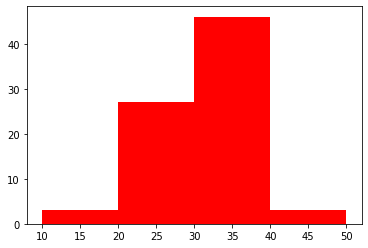

In [0]:
plt.hist(new,color='r',bins=[10,20,30,40,50])

Text(0.5, 1.0, 'MPG OF OLD FLEET')

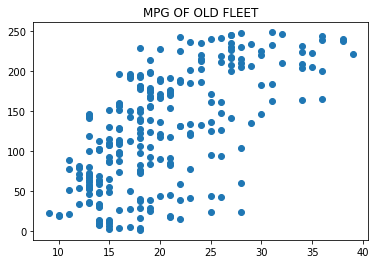

In [0]:
plt.scatter(old,range(1,len(old)+1))
plt.title('MPG OF OLD FLEET')

Text(0.5, 1.0, 'MPG OF NEW FLEET')

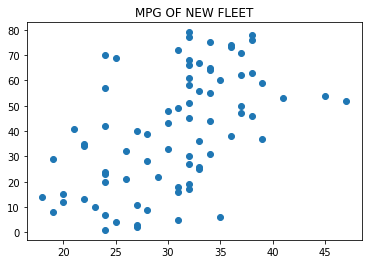

In [0]:
plt.scatter(new,range(1,len(new)+1))
plt.title('MPG OF NEW FLEET')

In [0]:
def boostrap_mean(sample, sample_size, n_iterations):
	data_mean = np.array([])
	for i in range(0,n_iterations):
		sample_itr = np.random.choice(sample, size=5)
		result = np.mean(sample_itr)	
		data_mean = np.append(data_mean, result)
	m=np.mean(data_mean)
	lower=np.percentile(data_mean,5)
	upper=np.percentile(data_mean,95)
	return m,lower,upper

(0, 100000)

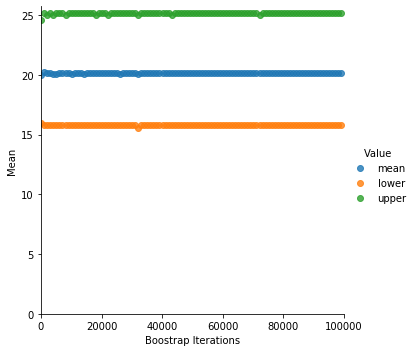

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(old, old.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

(0, 100000)

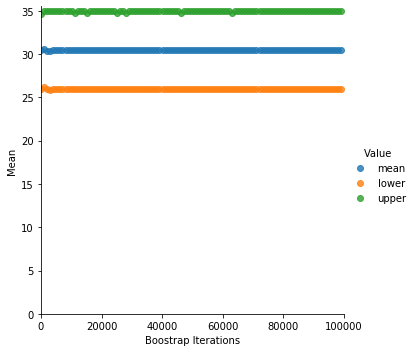

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(new, new.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [0]:
#permutation testing
conc=np.hstack((old,new))

In [0]:
old=old.flatten()
new=new.flatten()

In [0]:
old.shape

(1, 249)

In [0]:
type(old)

numpy.ndarray

In [0]:
old

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15., 15., 14., 15.,
       14., 22., 18., 21., 21., 10., 10., 11.,  9., 28., 25., 19., 16.,
       17., 19., 18., 14., 14., 14., 14., 12., 13., 13., 18., 22., 19.,
       18., 23., 26., 25., 20., 21., 13., 14., 15., 14., 17., 11., 13.,
       12., 13., 15., 13., 13., 14., 22., 28., 13., 14., 13., 14., 15.,
       12., 13., 13., 14., 13., 12., 13., 18., 16., 18., 18., 23., 11.,
       12., 13., 12., 18., 21., 19., 21., 15., 16., 15., 11., 20., 21.,
       19., 15., 26., 25., 16., 16., 18., 16., 13., 14., 14., 14., 28.,
       19., 18., 15., 15., 16., 15., 16., 14., 17., 16., 15., 18., 21.,
       20., 13., 23., 20., 23., 18., 19., 25., 26., 18., 16., 16., 15.,
       22., 22., 24., 23., 29., 25., 20., 18., 19., 18., 27., 13., 17.,
       13., 13., 13., 30., 26., 18., 17., 16., 15., 18., 21., 19., 19.,
       16., 16., 16., 16., 25., 26., 31., 34., 36., 20., 19., 20., 19.,
       21., 20., 25., 21., 19., 21., 21., 19., 18., 19., 18., 18

In [0]:
len(conc)

328

In [0]:
len(old)

249

In [0]:
len(new)

79

In [0]:
perm=np.random.permutation(conc)

In [0]:
pold=perm[:249]

In [0]:
pnew=perm[249:]

In [0]:
len(pnew)

79

In [0]:
def perm_test(old,new,itr):
  total_mean = np.array([])
  for i in range(0,itr):
    conc=np.hstack((old,new))
    perm=np.random.permutation(conc)
    pold=perm[:249]
    pnew=perm[249:]
    old_mean=np.mean(pold)
    new_mean=np.mean(pnew)
    tobs=old_mean-new_mean
    
  total_mean=np.append(total_mean,tobs)
  return total_mean


In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = perm_test(old, new, i)
    boots.append([i, boot[0], "mean"])

In [0]:
tm=boots[1]

In [0]:
type(tm)

list

In [0]:
np.mean(tm)

TypeError: ignored

In [0]:
# Load and visualise the vehicles dataset
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

old = df.values.T[0]
new = df.values.T[1]
print(new)


[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32. nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [0]:
new = new[np.logical_not(np.isnan(new))]

In [0]:
act_old_mean=np.mean(old)
act_new_mean=np.mean(new)

In [0]:
act_mean=act_new_mean-act_old_mean

In [0]:
act_new_mean

30.481012658227847

In [0]:
def perm_test(old,new,act_mean):
  count=0
  for i in range(0,50000):
    conc=np.hstack((old,new))
    perm=np.random.permutation(conc)
    pold=perm[:249]
    pnew=perm[249:]
    old_mean=np.mean(pold)
    new_mean=np.mean(pnew)
    tobs = new_mean - old_mean
    #print(tobs)
    #print(act_mean)
    if tobs > act_mean:
      count = count+1
      
    else:
      #print(count)
      continue
  return count

In [0]:
p=perm_test(old,new,act_mean)

In [0]:
def boostrap_mean(sample, sample_size, n_iterations):
	data_mean = np.array([])
	for i in range(0,n_iterations):
		sample_itr = np.random.choice(sample, size=5)
		result = np.mean(sample_itr)	
		data_mean = np.append(data_mean, result)
  
  lower=np.percentile(data_mean,5)
  upper=np.percentile(data_mean,95)
  np.sort(data_mean)
  data_mean=data_mean[data_mean>5 and data_mean<95]
	m=np.mean(data_mean)
  return m,lower,upper

IndentationError: ignored

23.025316455696203

In [0]:
p

0

In [0]:
old=old[any(i>5 and i<95 for i in old)]

In [0]:
tr= np.array([range(1,100)])

In [0]:
if all(i>5 for i in tr):
  new_tr=i

ValueError: ignored

In [0]:
new_tr=list()
for i in tr:
  if True in (i>5 and i>95):
    new_tr.append(i)

ValueError: ignored

In [0]:
val=tr[((tr>5) & (tr<95))]

In [0]:
np.sort(val)

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94])

In [0]:
def boostrap_mean(sample, sample_size, n_iterations):
	data_mean = np.array([])
	for i in range(0,n_iterations):
		sample_itr = np.random.choice(sample, size=5)
		result = np.mean(sample_itr)	
		data_mean = np.append(data_mean, result)
	#m=np.mean(data_mean)
	lower=np.percentile(data_mean,5)
	upper=np.percentile(data_mean,95)
  val= data_mean [((data_mean>5) & (data_mean<95))]
	return val,lower,upper

IndentationError: ignored

In [0]:
def boostrap_mean(old,itr):
  data_mean = np.array([])
  for i in range(0,itr):
    sample_itr = np.random.choice(old,size=5)
    result = np.mean(sample_itr)
    data_mean = np.append(data_mean, result)
  l=np.percentile(data_mean,5)
  u=np.percentile(data_mean,95)
  data_mean=np.sort(data_mean)
  val=data_mean[((data_mean>l) & (data_mean<u))]
  m_val=np.mean(val)
  return m_val

In [0]:

v=boostrap_mean(old,10000)

In [0]:
v

20.12152436298614

In [0]:
def boostrap_mean(old,itr):
  data_mean = np.array([])
  for i in range(0,itr):
    sample_itr = np.random.choice(old,size=5)
    result = np.mean(sample_itr)
    data_mean = np.append(data_mean, result)
  l=np.percentile(data_mean,5)
  u=np.percentile(data_mean,95)
  data_mean=np.sort(data_mean)
  val=data_mean[((data_mean>l) & (data_mean<u))]
  m_val=np.mean(val)
  return m_val

In [0]:
v=boostrap_mean(new,10000)

In [0]:
v

30.488494780558984

In [0]:
val1[2]

17.8

In [0]:
def boostrap_mean(old,itr):
  data_mean = np.array([])
  for i in range(0,itr):
    sample_itr = np.random.choice(old,size=5)
    result = np.mean(sample_itr)
    data_mean = np.append(data_mean, result)
  l=np.percentile(data_mean,5)
  u=np.percentile(data_mean,95)
  data_mean=np.sort(data_mean)
  val=data_mean[((data_mean>l) & (data_mean<u))]
  m_val=np.mean(val)
  return m_val

In [0]:
o = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
n = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [0]:
xo=np.mean(o)
xn=np.mean(n)

In [0]:
tobs=xn=xo

In [0]:
v=perm_test(o,n,tobs)

In [0]:
def perm_test(old,new,act_mean):
  count=0
  for i in range(0,20000):
    conc=np.hstack((old,new))
    perm=np.random.permutation(conc)
    pold=perm[:int(len(perm)/2)]
    pnew=perm[int(len(perm)/2):]

    old_mean=np.mean(pold)
    new_mean=np.mean(pnew)
    tobs = new_mean - old_mean
    #print(tobs)
    #print(act_mean)
    if tobs > act_mean:
      count = count+1
      
    else:
      #print(count)
      continue
  return count

In [0]:
v/20000

0.1781